In [1]:
import re
import time
import math
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [2]:
# Load data
TX_2013_crime = pd.read_csv('C:/Users/keith/Desktop/Thinkful/2013_Texas_crimes.csv',encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows


In [3]:
TX_2013_crime 

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,TEXAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Abernathy,"2,821",0,0,NaN,0,0,0,12,12,0,0,1,NaN
5,Abilene,"119,401",477,1,NaN,37,125,314,"4,769","1,055","3,460",254,16,NaN
6,Addison,"15,961",51,1,NaN,4,11,35,784,129,593,62,1,NaN
7,Alamo,"18,876",164,0,NaN,11,27,126,"1,336",203,"1,052",81,1,NaN
8,Alamo Heights,"7,443",9,0,NaN,2,2,5,235,36,194,5,0,NaN
9,Alice,"19,673",155,0,NaN,9,11,135,"1,208",236,929,43,14,NaN


## Data Cleaning

In [4]:
TX_2013_crime = TX_2013_crime.drop('Unnamed: 13',1)

In [5]:
cols = ['City', 'Population', 'Violent_crime', 'Murder_and_nonnegligent_manslaughter', 'Rape1',
 'Rape2', 'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_vehicle_theft',
 'Arson3']

In [6]:
TX_2013_crime.columns = cols
TX_2013_crime = TX_2013_crime.drop(TX_2013_crime.index[0:4]).drop(TX_2013_crime.index[608:]).reset_index(drop=True)

In [7]:
TX_2013_crime.isnull().sum()

City                                      0
Population                                0
Violent_crime                             0
Murder_and_nonnegligent_manslaughter      0
Rape1                                   563
Rape2                                    41
Robbery                                   0
Aggravated_assault                        0
Property_crime                            0
Burglary                                  0
Larceny_theft                             0
Motor_vehicle_theft                       0
Arson3                                    2
dtype: int64

In [8]:
cols = ['Population', 'Violent_crime',
       'Murder_and_nonnegligent_manslaughter', 'Rape2', 'Robbery',
       'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny_theft',
       'Motor_vehicle_theft', 'Arson3']
for i in TX_2013_crime[cols]:
    TX_2013_crime[i] = TX_2013_crime[i].str.replace(",","")
    TX_2013_crime[i] = pd.to_numeric(TX_2013_crime[i]).dropna()

In [9]:
TX_2013_crime = TX_2013_crime.drop('Rape1',1)

## Exploratory data analysis

In [10]:
TX_2013_crime.isnull().sum()

City                                     0
Population                               0
Violent_crime                            0
Murder_and_nonnegligent_manslaughter     0
Rape2                                   41
Robbery                                  0
Aggravated_assault                       0
Property_crime                           0
Burglary                                 0
Larceny_theft                            0
Motor_vehicle_theft                      0
Arson3                                   2
dtype: int64

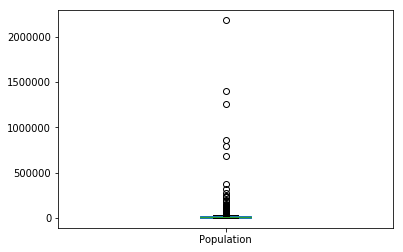

count    6.040000e+02
mean     3.068933e+04
std      1.332682e+05
min      1.680000e+02
25%      2.539000e+03
50%      5.567500e+03
75%      1.613025e+04
max      2.180606e+06
Name: Population, dtype: float64

In [11]:
TX_2013_crime.Population.plot(kind="box")
plt.show()
TX_2013_crime.Population.describe()

In [12]:
# calculation population z scores to identify outliers

z = []
from scipy import stats
for i in stats.zscore(TX_2013_crime.Population):
    z.append(i)

TX_2013_crime['pop_z_scores'] = z
TX_2013_crime.sort_values(by="Population")


,City,Population,Violent_crime,Murder_and_nonnegligent_manslaughter,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,pop_z_scores
386,Oak Ridge,168,2,0,0.0,0,2,0,0,0,0,0.0,-0.229212
522,Stagecoach,561,0,0,0.0,0,0,8,8,0,0,0.0,-0.226260
220,Hawley,610,1,0,0.0,0,1,17,9,6,2,0.0,-0.225892
365,Montgomery,670,1,0,0.0,0,1,16,5,10,1,0.0,-0.225442
530,Sunrise Beach Village,692,0,0,0.0,0,0,5,1,4,0,0.0,-0.225276
531,Sunset Valley,696,3,0,0.0,3,0,121,1,120,0,0.0,-0.225246
87,Chillicothe,697,0,0,0.0,0,0,9,3,5,1,1.0,-0.225239
578,Westover Hills,708,0,0,0.0,0,0,17,4,12,1,0.0,-0.225156
285,Kress,721,0,0,0.0,0,0,2,0,2,0,0.0,-0.225059
142,Driscoll,751,1,0,0.0,0,1,3,2,1,0,0.0,-0.224833


In [13]:
# dropping outliers
TX_2013_crime = TX_2013_crime.drop(TX_2013_crime.index[[241,475,124,23,175,156]])  

# Dropping Rape2 becasue of too many null values

TX_2013_crime = TX_2013_crime.drop('Rape2',1)

TX_2013_crime.index = pd.RangeIndex(len(TX_2013_crime.index))
TX_2013_crime.index = range(len(TX_2013_crime.index))
TX_2013_crime.head(3)

,City,Population,Violent_crime,Murder_and_nonnegligent_manslaughter,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,pop_z_scores
0,Abernathy,2821,0,0,0,0,12,12,0,0,1.0,-0.209288
1,Abilene,119401,477,1,125,314,4769,1055,3460,254,16.0,0.666214
2,Addison,15961,51,1,11,35,784,129,593,62,1.0,-0.110608


In [14]:
TX_2013_crime.isnull().sum()

City                                    0
Population                              0
Violent_crime                           0
Murder_and_nonnegligent_manslaughter    0
Robbery                                 0
Aggravated_assault                      0
Property_crime                          0
Burglary                                0
Larceny_theft                           0
Motor_vehicle_theft                     0
Arson3                                  2
pop_z_scores                            0
dtype: int64

In [15]:
TX_2013_crime.Arson3[TX_2013_crime.Arson3.isnull() == True].index.tolist()

[92, 125]

In [16]:
TX_2013_crime.Arson3.mean()

2.2332214765100673

In [17]:
TX_2013_crime.Arson3[92]=2
TX_2013_crime.Arson3[125]=2

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
TX_2013_crime.isnull().sum()

City                                    0
Population                              0
Violent_crime                           0
Murder_and_nonnegligent_manslaughter    0
Robbery                                 0
Aggravated_assault                      0
Property_crime                          0
Burglary                                0
Larceny_theft                           0
Motor_vehicle_theft                     0
Arson3                                  0
pop_z_scores                            0
dtype: int64

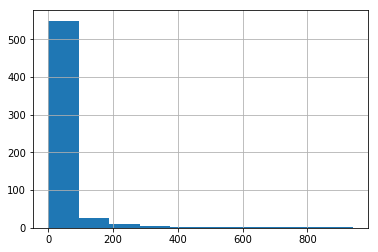

In [19]:
TX_2013_crime.Motor_vehicle_theft.hist()

In [20]:
TX_2013_crime.Motor_vehicle_theft.describe()

count    598.000000
mean      33.946488
std       96.289784
min        0.000000
25%        1.000000
50%        5.000000
75%       23.000000
max      940.000000
Name: Motor_vehicle_theft, dtype: float64

In [21]:
# Create binary Target

TX_2013_crime.loc[TX_2013_crime['Motor_vehicle_theft'] <= 5, 'Motor_vehicle_theft'] = 0
TX_2013_crime.loc[TX_2013_crime['Motor_vehicle_theft'] > 5, 'Motor_vehicle_theft'] = 1
TX_2013_crime.Motor_vehicle_theft.value_counts()

0    300
1    298
Name: Motor_vehicle_theft, dtype: int64

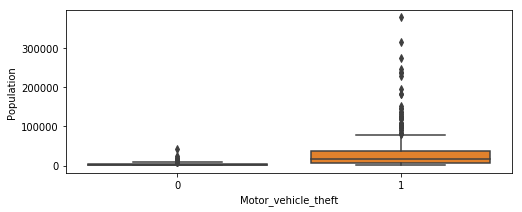

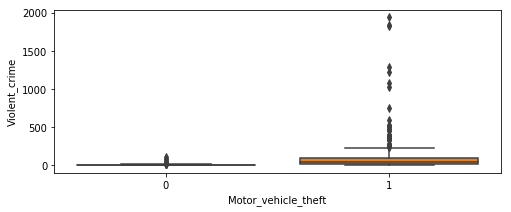

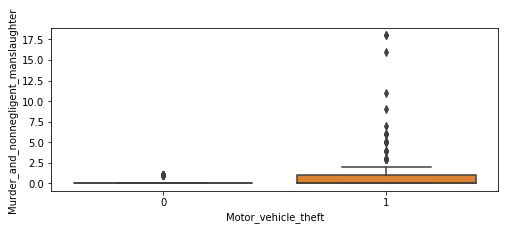

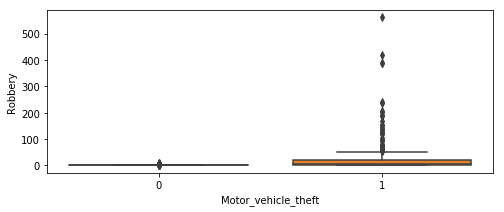

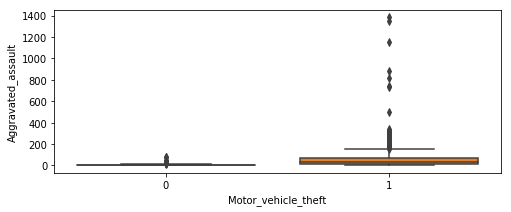

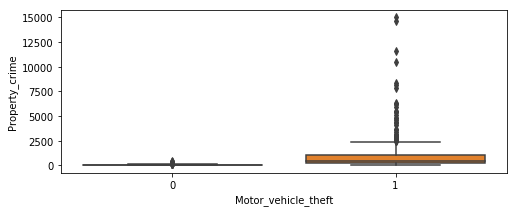

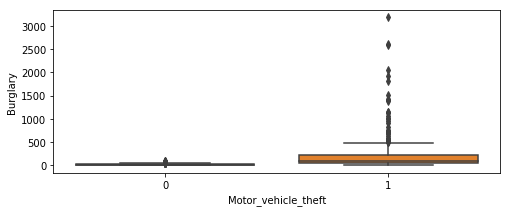

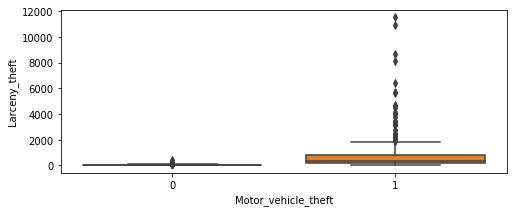

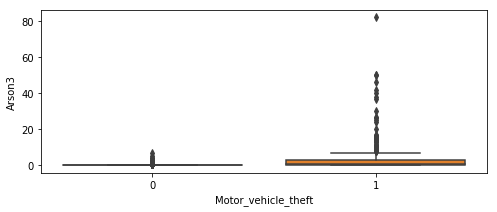

In [22]:
for i in  TX_2013_crime.drop(['Motor_vehicle_theft','City','pop_z_scores'],1):
    fig, ax = pyplot.subplots(figsize=(8, 3))
    sns.boxplot(x='Motor_vehicle_theft', y= i, data=TX_2013_crime,ax=ax)

In [23]:
TX_2013_crime['Population_log'] = [ math.log(x) for x in  TX_2013_crime['Population']] 
TX_2013_crime[''

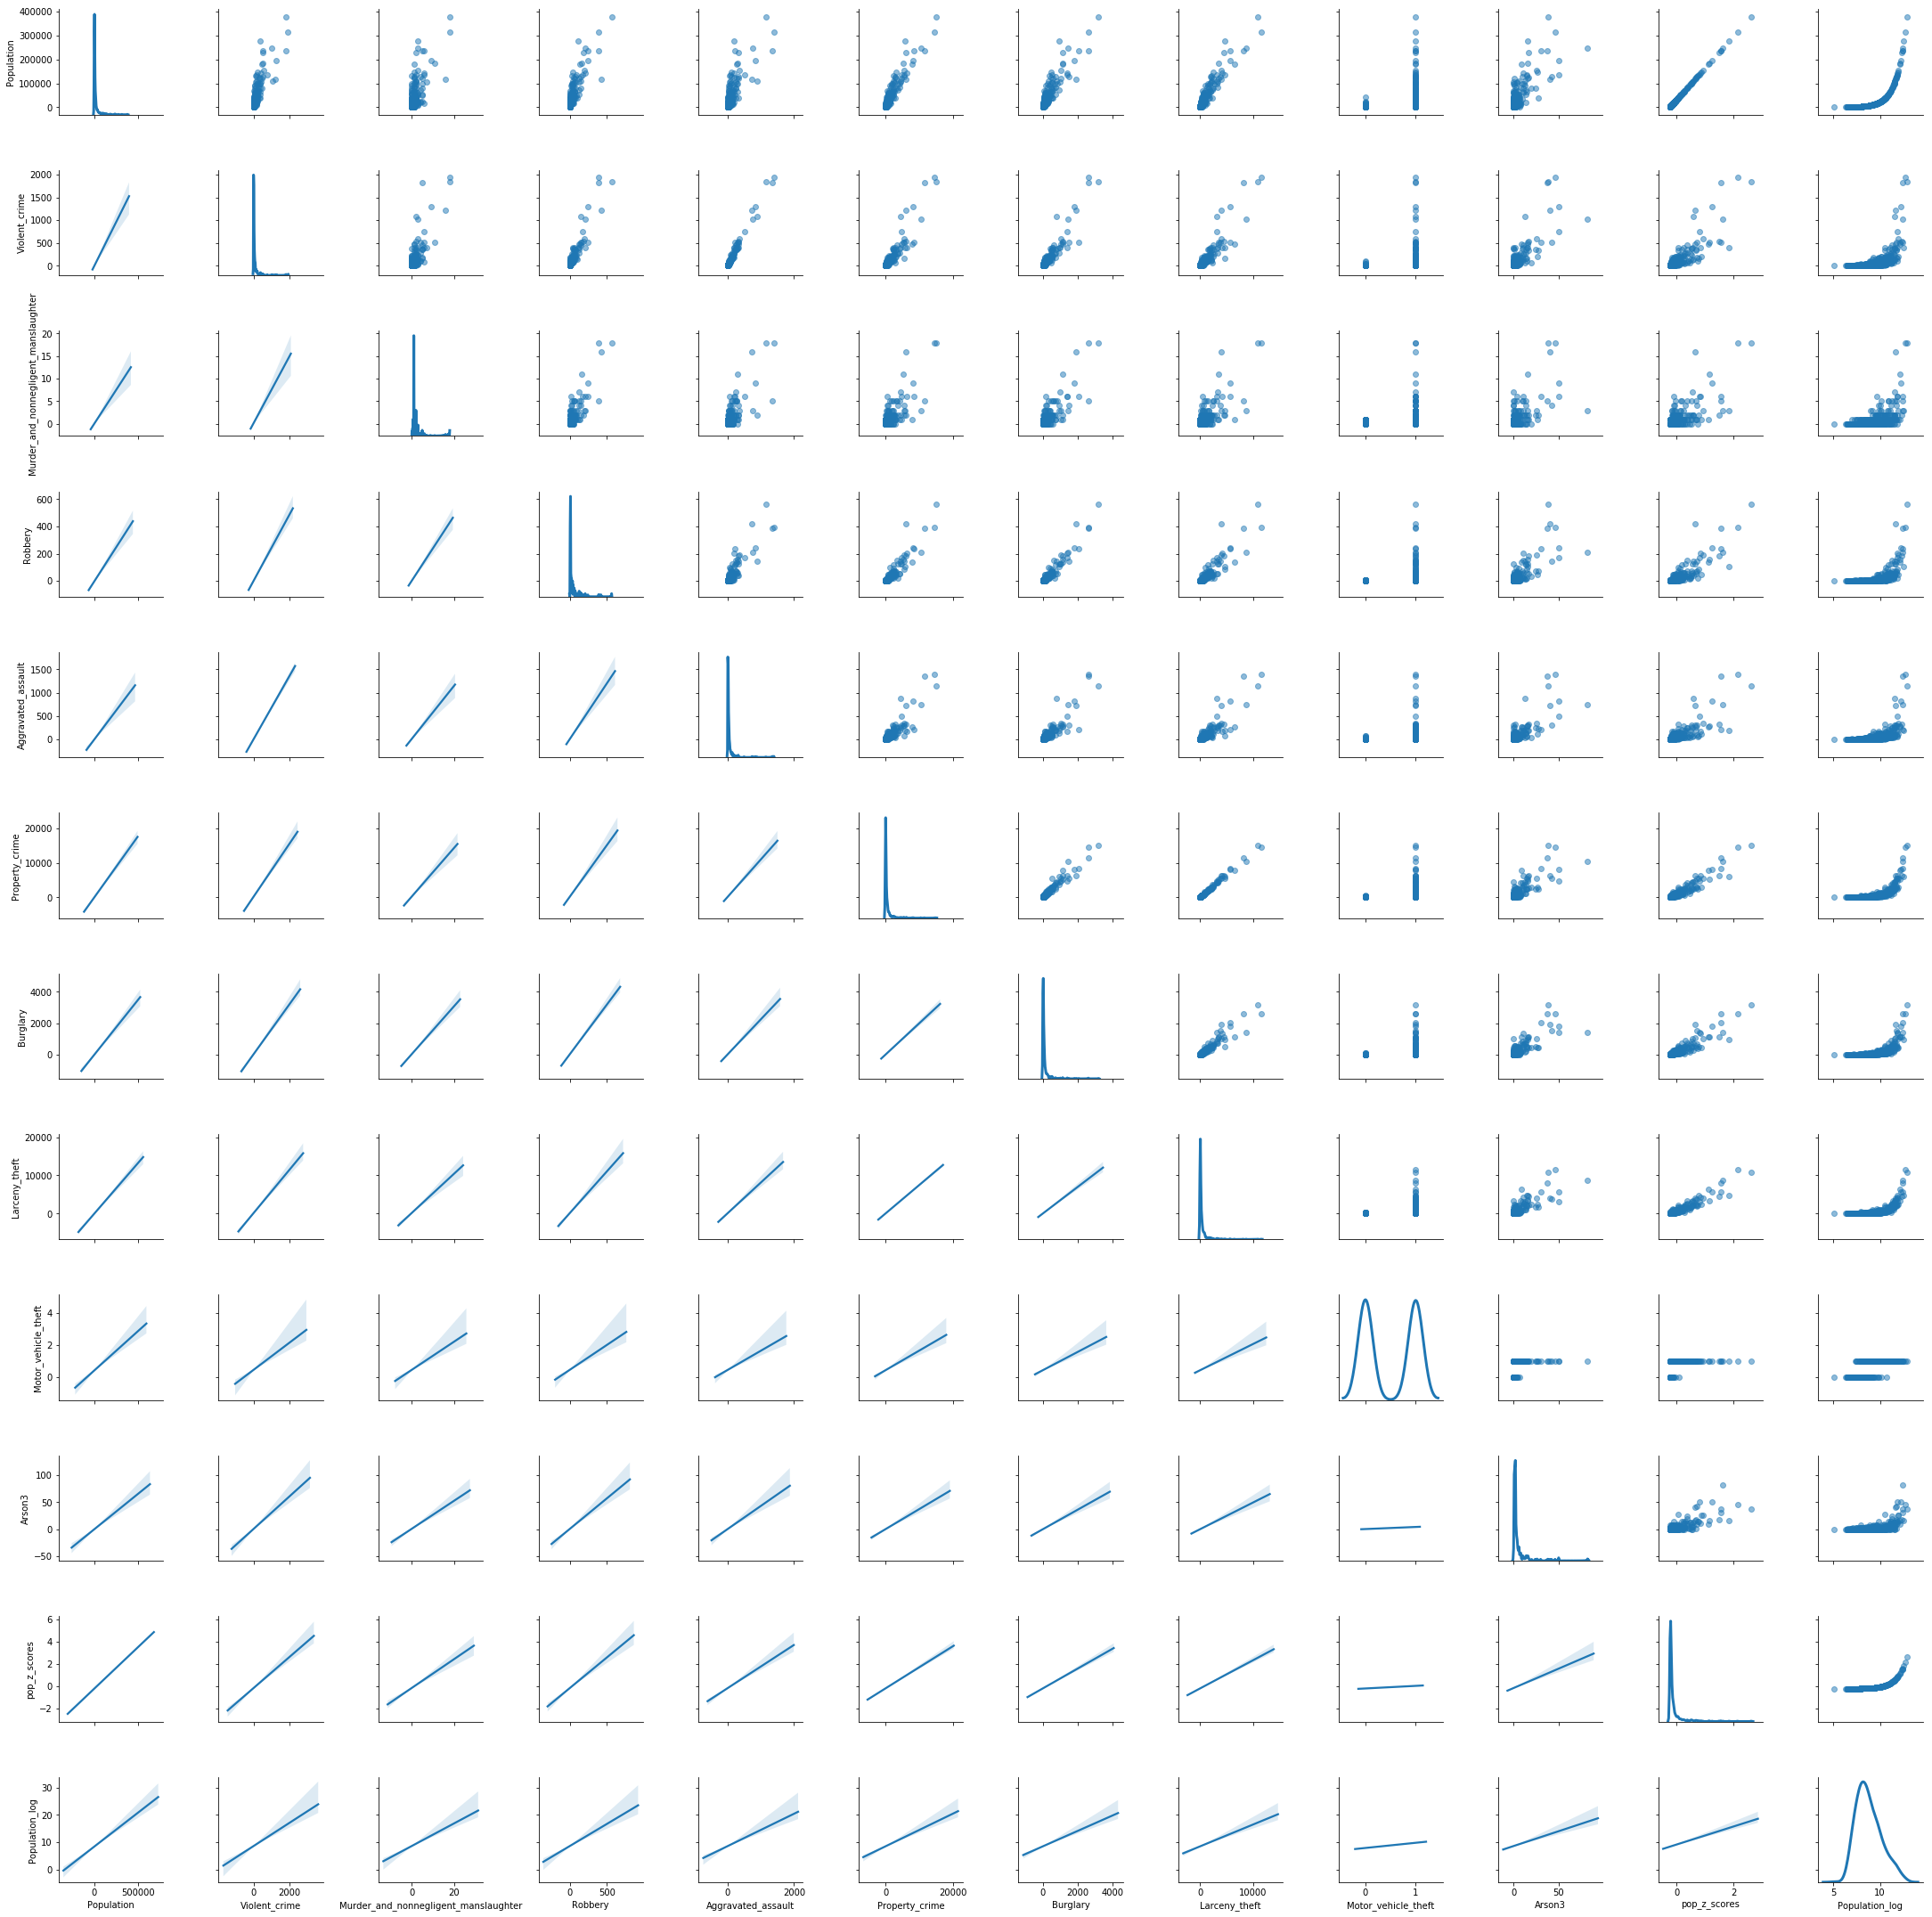

In [24]:
#pair plot 
g = sns.PairGrid(TX_2013_crime , diag_sharey=False) 
g.map_upper(plt.scatter, alpha=.5) 
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0)) 
g.map_diag(sns.kdeplot, lw=3)
plt.show()

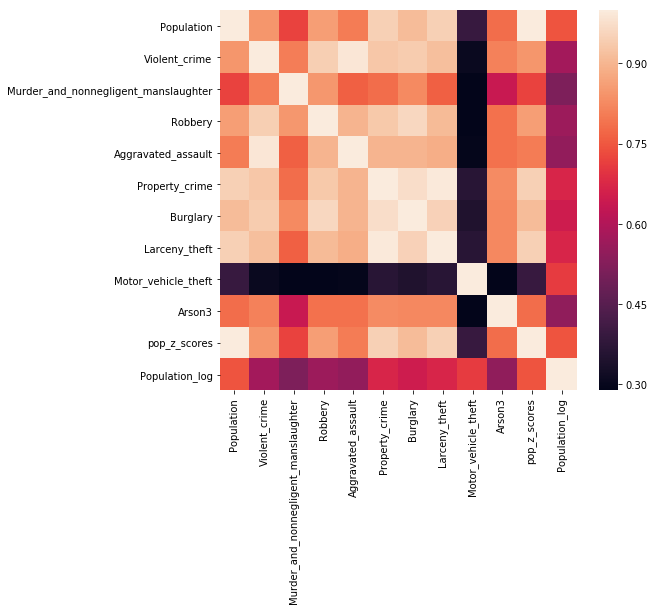

In [25]:
plt.figure(figsize=(8,7))
sns.heatmap(TX_2013_crime.corr())

In [120]:
# scaling data

TX_crime_scld = TX_2013_crime.drop(['City','Motor_vehicle_theft','pop_z_scores'],1)
names = TX_crime_scld.columns
TX_crime_scld = pd.DataFrame(preprocessing.scale(TX_crime_scld), columns=names)

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


## 1. Vanilla logistic regression

In [121]:
# Declare a logistic regression classifier.

lr = LogisticRegression(random_state=20, fit_intercept=False ,solver='liblinear',max_iter=100000) 

 
Y = TX_2013_crime['Motor_vehicle_theft']
X = TX_crime_scld
 
# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by Motor vehicle theft')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

Coefficients
[[-2.39492939e+00 -8.95978118e-02  1.64923788e-01 -2.74280070e-01
   1.51349991e-03  1.11101960e+00 -3.94241174e-02  1.13228858e+00
   2.70371189e-01  3.26902233e+00]]
0.0

 Accuracy by Motor vehicle theft
Motor_vehicle_theft    0    1
row_0                        
0                    271   56
1                     29  242

 Percentage accuracy
0.8578595317725752


In [122]:
print(cross_val_score(lr, X, Y, cv=10))

[0.86666667 0.78333333 0.9        0.83333333 0.83333333 0.81666667
 0.86666667 0.9        0.83050847 0.91525424]


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(lr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(lr.fit(X, Y).score(X, Y)))
    

With 20% Holdout: 0.8166666666666667
Testing on Sample: 0.8578595317725752


In [124]:
# Classification report

from sklearn.metrics import classification_report
pred_y = lr.predict(X_test)
target_names = ['Motor vehicle thefts < 5','Motor vehicle thefts > 5']
print(classification_report(y_test,pred_y, target_names=target_names))

                          precision    recall  f1-score   support

Motor vehicle thefts < 5       0.78      0.89      0.83        55
Motor vehicle thefts > 5       0.89      0.78      0.84        65

               micro avg       0.83      0.83      0.83       120
               macro avg       0.84      0.84      0.83       120
            weighted avg       0.84      0.83      0.83       120



## 2. Ridge logistic regression

In [125]:
Y = TX_2013_crime['Motor_vehicle_theft']
X = TX_crime_scld
 
log_Rr = LogisticRegression(penalty='l2',fit_intercept=False, solver='lbfgs', max_iter=100000, random_state=20)
fit = log_Rr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = log_Rr.predict(X)

print('\n Accuracy by Motor vehicle theft')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(log_Rr.score(X, Y))

Coefficients
[[-2.39381536 -0.08943522  0.16493935 -0.27511097  0.00357656  1.11245433
  -0.04159098  1.13018394  0.27097691  3.26893829]]
[0.]

 Accuracy by Motor vehicle theft
Motor_vehicle_theft    0    1
row_0                        
0                    271   56
1                     29  242

 Percentage accuracy
0.8578595317725752


In [126]:
print(cross_val_score(log_Rr, X, Y, cv=10))

[0.86666667 0.78333333 0.9        0.83333333 0.83333333 0.81666667
 0.86666667 0.9        0.83050847 0.91525424]


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(log_Rr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(log_Rr.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.8166666666666667
Testing on Sample: 0.8578595317725752


In [34]:
# GridSearchCV for best parameters

param_grid = dict(penalty=['l2'],C=np.arange(87,100,.1),solver=['lbfgs','sag'])
grid = GridSearchCV(log_Rr, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=20, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'C': array([87. , 87.1, ..., 99.8, 99.9]), 'solver': ['lbfgs', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [35]:
print(grid.best_params_)
print(grid.best_score_ )

{'C': 87.0, 'penalty': 'l2', 'solver': 'sag'}
0.8619246861924686


In [128]:
# updated parameters

log_Rr = LogisticRegression(penalty='l2', C=87, solver='sag', fit_intercept=False, max_iter=100000, random_state=20)
fit = log_Rr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = log_Rr.predict(X_test)

print('\n Accuracy by Motor vehicle theft')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Percentage accuracy')
print(log_Rr.score(X_test, y_test))

Coefficients
[[-5.45447273 -0.81835999  0.40958385 -0.7887883  -0.61274156  4.92880655
  -2.52426852  4.03202763  0.56378302  4.19538752]]
[0.]

 Accuracy by Motor vehicle theft
Motor_vehicle_theft   0   1
row_0                      
0                    48  13
1                     7  52

 Percentage accuracy
0.8333333333333334


In [129]:
print(cross_val_score(log_Rr, X_train, y_train, cv=10))

[0.81632653 0.81632653 0.85714286 0.89583333 0.85416667 0.91489362
 0.87234043 0.85106383 0.82978723 0.91489362]


In [130]:
print('With 20% Holdout: ' + str(log_Rr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(log_Rr.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.8333333333333334
Testing on Sample: 0.8645484949832776


In [131]:
# Classification report

from sklearn.metrics import classification_report
pred_y = log_Rr.predict(X_test)
target_names = ['Motor vehicle thefts < 5','Motor vehicle thefts > 5']
print(classification_report(y_test,pred_y, target_names=target_names))

                          precision    recall  f1-score   support

Motor vehicle thefts < 5       0.77      0.87      0.82        55
Motor vehicle thefts > 5       0.88      0.78      0.83        65

               micro avg       0.82      0.82      0.82       120
               macro avg       0.83      0.83      0.82       120
            weighted avg       0.83      0.82      0.83       120



## 3. Lasso logistic regression
  


In [132]:
#X = TX_2013_crime.drop(['City','Motor_vehicle_theft','pop_z_scores'],1)
Y = TX_2013_crime['Motor_vehicle_theft']

X = TX_crime_scld
#Y = data.Motor_vehicle_theft
 
logr_lasso = LogisticRegression(penalty='l1',solver='liblinear', fit_intercept=False, random_state=20)
fit = logr_lasso.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = logr_lasso.predict(X)

print('\n Accuracy by Motor vehicle theft')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(logr_lasso.score(X, Y))

Coefficients
[[-3.42963862  0.          0.          0.          0.          0.
   0.          3.23431144  0.00391574  3.63291796]]
0.0

 Accuracy by Motor vehicle theft
Motor_vehicle_theft    0    1
row_0                        
0                    273   56
1                     27  242

 Percentage accuracy
0.8612040133779264


In [133]:
print(cross_val_score(logr_lasso, X, Y, cv=10))

[0.86666667 0.8        0.9        0.83333333 0.81666667 0.81666667
 0.88333333 0.9        0.83050847 0.91525424]


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(logr_lasso.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr_lasso.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.8333333333333334
Testing on Sample: 0.8612040133779264


In [53]:
param_grid = dict(penalty=['l1'],C=np.arange(30,80,.1),solver=['liblinear','saga'])
grid = GridSearchCV(lr, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=20, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1'], 'C': array([30. , 30.1, ..., 79.8, 79.9]), 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [57]:
print(grid.best_params_)
print(grid.best_score_ )

{'C': 63.500000000000476, 'penalty': 'l1', 'solver': 'liblinear'}
0.8702928870292888


In [135]:
logr_lasso = LogisticRegression(penalty='l1',C=63.500000000000476, solver='liblinear', max_iter=100000, random_state=20)
fit = logr_lasso.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = logr_lasso.predict(X_test)

print('\n Accuracy by Motor vehicle theft')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Percentage accuracy')
print(logr_lasso.score(X_test, y_test))

Coefficients
[[-6.40076584e+00 -5.27182223e+00  1.66081278e+00  1.31444685e+01
   0.00000000e+00  5.74760056e+02 -1.17883011e+02 -4.20846159e+02
   9.56800397e-02  2.28167020e+00]]
[13.54404855]

 Accuracy by Motor vehicle theft
Motor_vehicle_theft   0   1
row_0                      
0                    51   6
1                     4  59

 Percentage accuracy
0.9166666666666666


In [136]:
print(cross_val_score(logr_lasso, X_train, y_train, cv=10))

[0.95918367 0.95918367 0.97959184 0.95833333 0.91666667 0.9787234
 0.93617021 0.93617021 0.91489362 0.9787234 ]


In [137]:
print('With 20% Holdout: ' + str(logr_lasso.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr_lasso.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.9166666666666666
Testing on Sample: 0.9698996655518395


In [138]:
# Classification report

from sklearn.metrics import classification_report
pred_y = logr_lasso.predict(X_test)
target_names = ['Motor vehicle thefts < 5','Motor vehicle thefts > 5']
print(classification_report(y_test,pred_y, target_names=target_names))

                          precision    recall  f1-score   support

Motor vehicle thefts < 5       0.93      0.95      0.94        55
Motor vehicle thefts > 5       0.95      0.94      0.95        65

               micro avg       0.94      0.94      0.94       120
               macro avg       0.94      0.94      0.94       120
            weighted avg       0.94      0.94      0.94       120

